In [199]:
#Importing Libraries 

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
from scipy.stats import pearsonr , spearmanr


data=pd.read_csv('Household.csv')


In [200]:
#Derived Variable Creation.
data=data.iloc[:,0:12]
data['Average Room Size']= data['Living Space']/data['Bedrooms Count']
data['% of Area under Living space']=data['Living Space']/data['Area_Sqft']
data

,ID,Local Price,Bathrooms Count,Area_Sqft,Living Space,Garrage Count,Rooms Count,Bedrooms Count,Age,Material,Level,Selling Price,Average Room Size,% of Area under Living space
0,1,4.9176,1.0,3.4720,0.9980,1.0,7,4,42,Alumunium/Wood,Two story,25.9,0.249500,0.287442
1,2,5.0208,1.0,3.5310,1.5000,2.0,7,4,62,Brick,Two story,29.5,0.375000,0.424809
2,3,4.5429,1.0,2.2750,1.1750,1.0,6,3,40,Brick/Wood,Two story,27.9,0.391667,0.516484
3,4,4.5573,1.0,4.0500,1.2320,1.0,6,3,54,Wood,Two story,25.9,0.410667,0.304198
4,5,5.0597,1.0,4.4550,1.1210,1.0,6,3,42,Alumunium/Wood,Two story,29.9,0.373667,0.251627
5,6,3.8910,1.0,4.4550,0.9880,1.0,6,3,56,Brick/Wood,Two story,29.9,0.329333,0.221773
6,7,5.8980,1.0,5.8500,1.2400,1.0,7,3,51,Brick/Wood,Two story,30.9,0.413333,0.211966
7,8,5.6039,1.0,9.5200,1.5010,0.0,6,3,32,Brick,Two story,28.9,0.500333,0.157668
8,9,16.4202,2.5,9.8000,3.4200,2.0,10,5,42,Brick/Wood,Two story,84.9,0.684000,0.348980
9,10,14.4598,2.5,12.8000,3.0000,2.0,9,5,14,Wood,Two story,82.9,0.600000,0.234375


In [201]:
data['Material'].unique()

array(['Alumunium/Wood', 'Brick', 'Brick/Wood', 'Wood'], dtype=object)

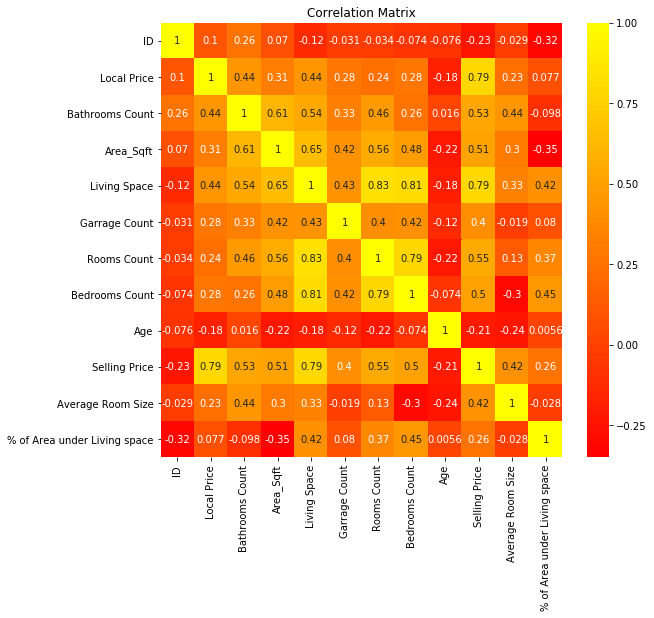

In [202]:
#Plotting Correlation Matrix
corrmat=data.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat, annot=True, ax=ax,cmap='autumn')
plt.title("Correlation Matrix")

plt.savefig('Price Correlation Matrix.jpg')

In [203]:
#Converting categorical data to dummy variable.
encoded_data = pd.get_dummies (data=data)
encoded_data

target=encoded_data.iloc[:,9]
Feature=encoded_data

#Dropping the Age column as it has very low co-relation with Selling Price.

Feature=Feature.drop(columns=['Selling Price','Age','Average Room Size','% of Area under Living space'])
Feature

,ID,Local Price,Bathrooms Count,Area_Sqft,Living Space,Garrage Count,Rooms Count,Bedrooms Count,Material_Alumunium/Wood,Material_Brick,Material_Brick/Wood,Material_Wood,Level_Ranch,Level_Split Level,Level_Two Story,Level_Two story
0,1,4.9176,1.0,3.4720,0.9980,1.0,7,4,1,0,0,0,0,0,0,1
1,2,5.0208,1.0,3.5310,1.5000,2.0,7,4,0,1,0,0,0,0,0,1
2,3,4.5429,1.0,2.2750,1.1750,1.0,6,3,0,0,1,0,0,0,0,1
3,4,4.5573,1.0,4.0500,1.2320,1.0,6,3,0,0,0,1,0,0,0,1
4,5,5.0597,1.0,4.4550,1.1210,1.0,6,3,1,0,0,0,0,0,0,1
5,6,3.8910,1.0,4.4550,0.9880,1.0,6,3,0,0,1,0,0,0,0,1
6,7,5.8980,1.0,5.8500,1.2400,1.0,7,3,0,0,1,0,0,0,0,1
7,8,5.6039,1.0,9.5200,1.5010,0.0,6,3,0,1,0,0,0,0,0,1
8,9,16.4202,2.5,9.8000,3.4200,2.0,10,5,0,0,1,0,0,0,0,1
9,10,14.4598,2.5,12.8000,3.0000,2.0,9,5,0,0,0,1,0,0,0,1


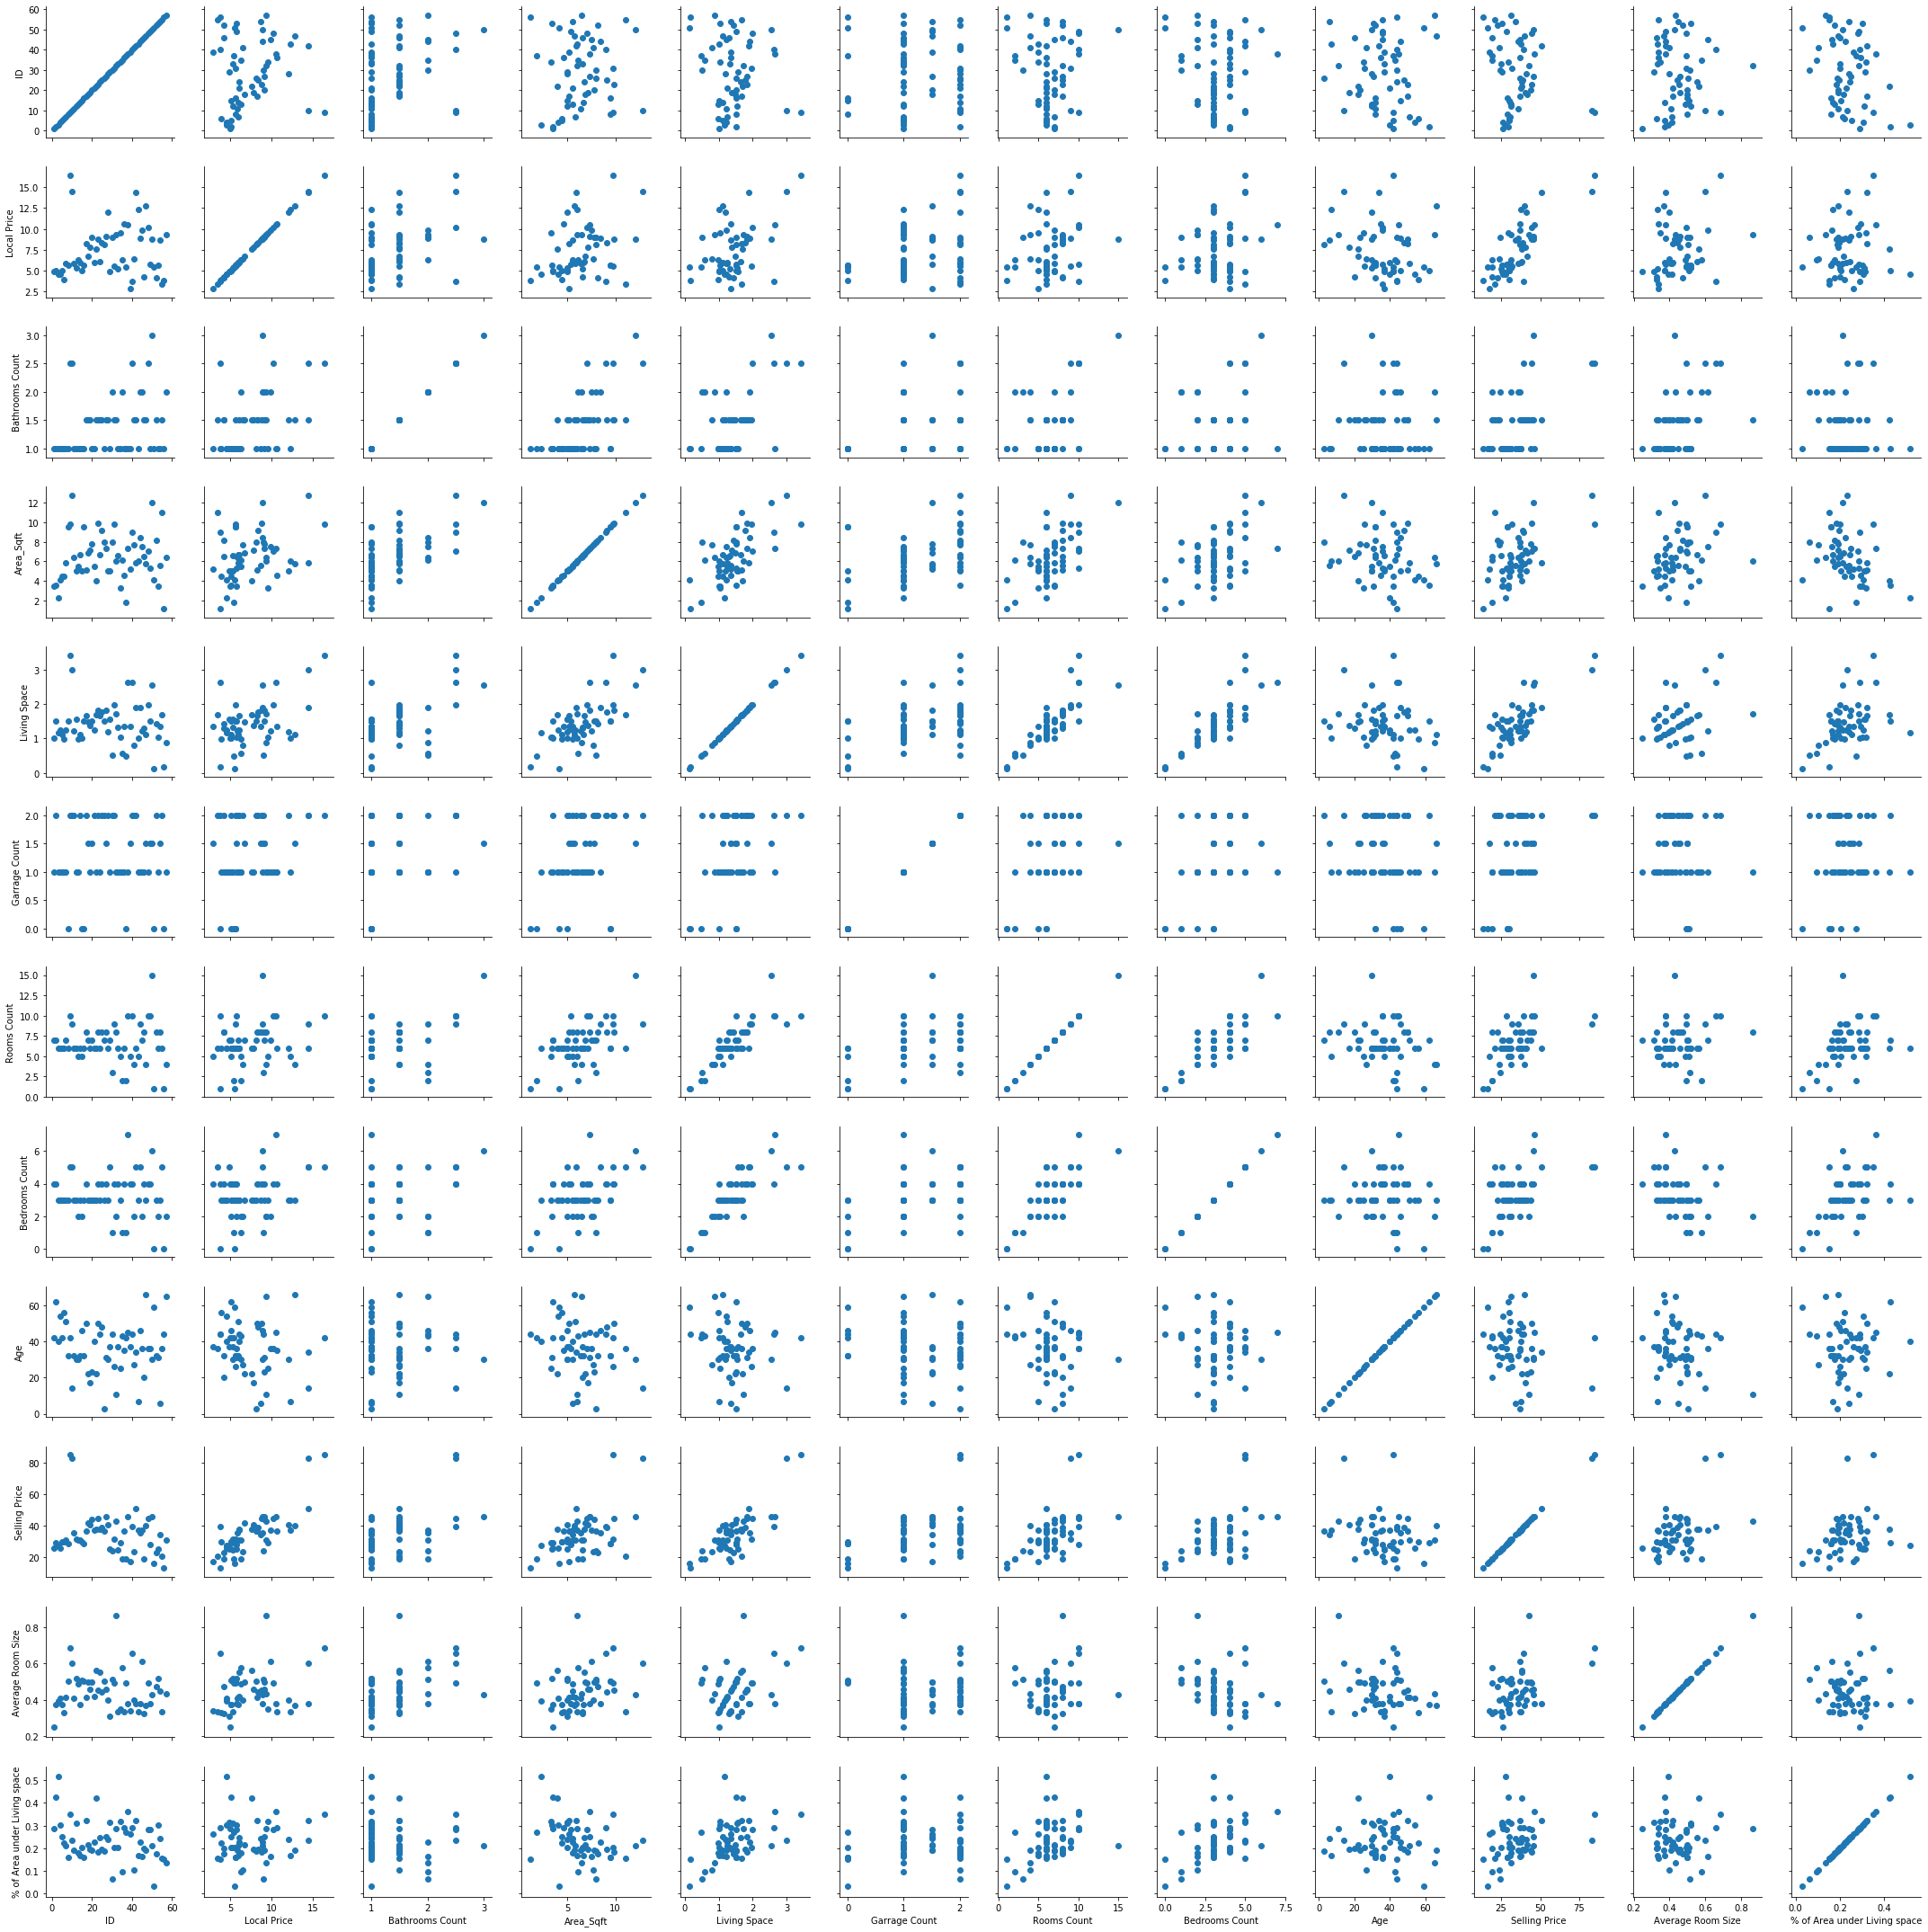

In [204]:
#Plotting Scatterplot 
import seaborn as sns


g = sns.PairGrid(data)
g.map(plt.scatter)
plt.savefig('Price_Hue-scatter.jpg')

In [205]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

X=Feature.iloc[:,1:]
y=target.iloc[:]


In [206]:




# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)



# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)



In [215]:
#R Sqaured value of model
print("R Sqaured value of model is :", regressor.score(X_test,y_test))

R Sqaured value of model is : 0.90288251230137


In [213]:
from sklearn import metrics
print('Mean Square Error is:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Square Error is: 3.0674728455458684


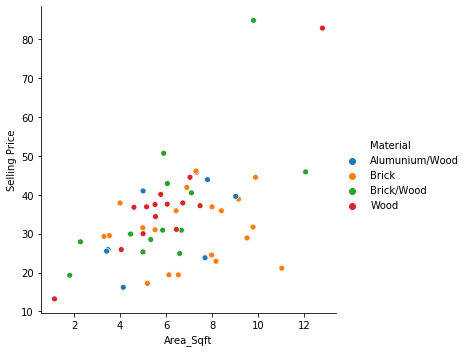

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.relplot(x='Area_Sqft', y='Selling Price', hue='Material', data=data, height=5)
plt.savefig('Price_Hue-Material.jpg')

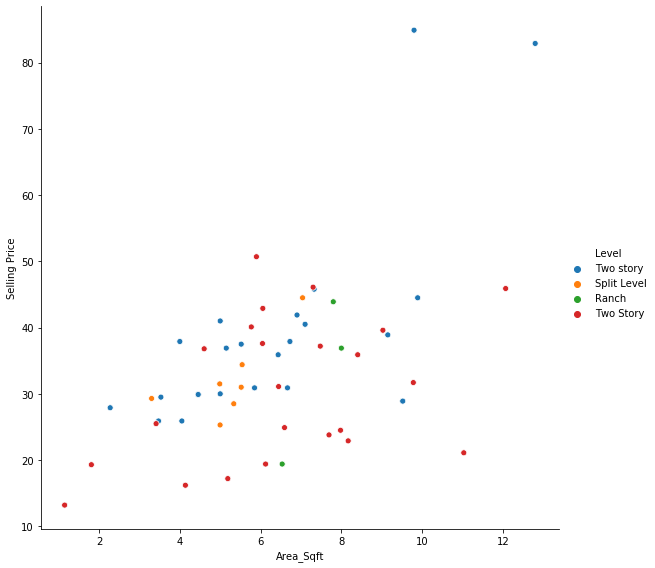

In [217]:
sns.relplot(x='Area_Sqft', y='Selling Price', hue='Level', data=data, height=8)
plt.savefig('Price_Hue-level.jpg')

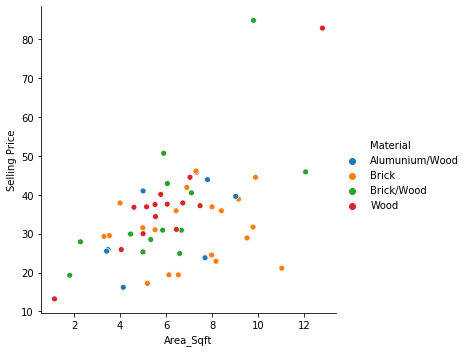

In [218]:
sns.relplot(x='Area_Sqft', y='Selling Price', hue='Material', data=data, height=5)
plt.savefig('Price_Hue-Material.jpg')

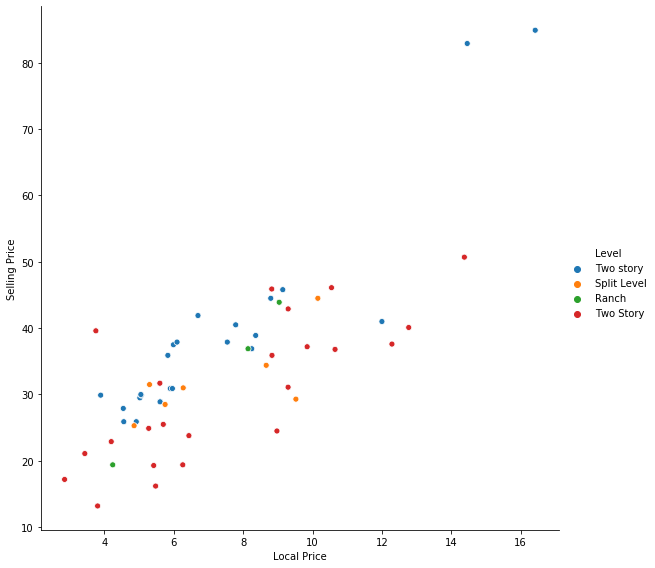

In [219]:
sns.relplot(x='Local Price', y='Selling Price', hue='Level', data=data, height=8)
plt.savefig('Local.jpg')

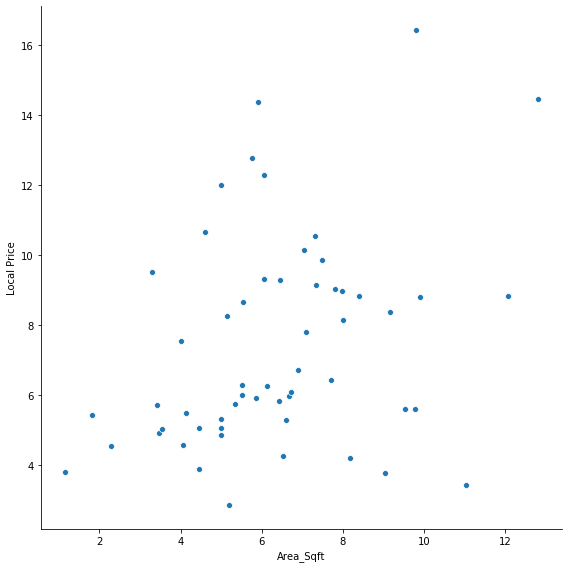

In [220]:
sns.relplot(x='Area_Sqft', y='Local Price', data=data, height=8)
plt.savefig('Local_Area.jpg')